# Project Name: Credit Card Fraud Detection

In [1]:
# Install Xgboost (eXtreme Gradient Boosting)

!pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   - -------------------------------------- 1.8/72.0 MB 17.7 MB/s eta 0:00:04
   ---- ----------------------------------- 8.1/72.0 MB 27.6 MB/s eta 0:00:03
   ----- ---------------------------------- 9.4/72.0 MB 18.0 MB/s eta 0:00:04
   ------ --------------------------------- 11.0/72.0 MB 14.6 MB/s eta 0:00:05
   ---------- ----------------------------- 18.1/72.0 MB 18.6 MB/s eta 0:00:03
   ----------- ---------------------------- 21.2/72.0 MB 17.9 MB/s eta 0:00:03
   ------------ --------------------------- 22.5/72.0 MB 16.2 MB/s eta 0:00:04
   ------------- -------------------------- 24.4/72.0 MB 15.0 MB/s eta 0:00:04
   ---------------- ----------------------- 29.1/72.0 MB 15.9 MB/s eta 0:00:03
   ----------------- ---------------------- 30.9/72.0 MB 15.1 MB/s eta 0:00:03
   ------------------ --------------------- 32.5/72.0 MB 14.4 MB/s eta 0:00:03
   -------------------- ------------------- 37.5/72.0 MB 15.1 MB

In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Step 2 : Load Dataset

In [8]:
url = "https://raw.githubusercontent.com/programmer-sahil/Ardent_ML_Training/main/Project%206/creditcard_synthetic.csv"
df = pd.read_csv(url)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.496714,-0.143423,-1.980572,1.049782,0.078838,-0.878442,0.960895,-0.036194,-0.218650,-1.303106,1.369878,0.255038,0.412781,-0.174362,-0.538522,0.032438,0.276511,-0.703024,-0.746091,-1.244839,-1.399822,1.451702,-0.336691,-0.057255,0.077838,-1.355097,0.491754,0.472624,10.357252,0
1,-0.138264,-0.032656,-1.054986,-0.780533,0.562897,0.618881,-0.369965,0.262368,0.382939,0.491719,-0.108265,-0.152038,1.773199,-0.713328,2.292061,-0.778078,1.043696,1.081171,0.757040,1.085824,0.547823,-2.544824,-0.172722,0.003785,-0.104032,-1.390843,0.608266,-1.003026,102.655124,0
2,0.647689,0.064295,-0.587028,1.199404,0.341102,-1.128860,-0.579581,0.231320,0.735142,2.675943,-1.083087,-1.106249,-1.523971,0.018782,-1.504112,-1.202091,0.003883,-0.377822,-0.427880,-2.535872,-0.120762,-0.507405,-0.409764,-1.335593,-0.186949,-0.048285,0.762813,0.134237,42.913457,0
3,1.523030,0.946861,0.149669,-0.061126,-1.277914,1.157451,0.933312,0.676311,-1.183365,-1.505715,1.391961,0.730613,-0.183776,2.091861,1.375205,0.697539,-1.038205,0.619661,2.228718,-0.326310,-0.283264,-0.132601,0.104254,-0.110330,-1.396816,-0.301422,0.011597,0.870338,22.044645,0
4,-0.234153,-0.747217,1.024162,0.856153,-0.186220,-0.747813,-2.731540,-0.909161,0.100739,-0.828139,-0.113177,0.699477,-0.102585,0.128138,0.325901,0.379631,1.176187,1.563962,-0.113275,-0.292503,0.767569,-0.231831,-0.814684,0.288094,-0.395986,-0.585248,0.797576,1.419409,13.049885,0


# Step 3 : Check Basic info

In [11]:
print (df.shape)
print (df['Class'].value_counts())


(15000, 30)
Class
0    14895
1      105
Name: count, dtype: int64


# Step 4 : Class Distribution Validation

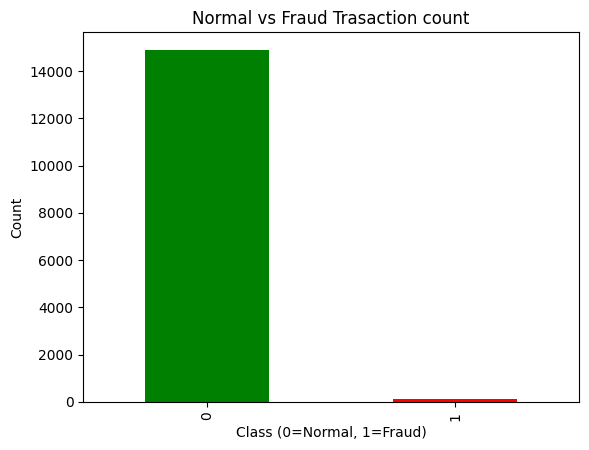

In [14]:
df['Class'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Normal vs Fraud Trasaction count")
plt.xlabel("Class (0=Normal, 1=Fraud)")
plt.ylabel("Count")
plt.show()

# Step 5 : Features & Target Separation

In [16]:
X = df.drop('Class', axis = 1)
y = df['Class']

# Step 6 : Train Test Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Step 7 : Model-1: Random Forest

In [20]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# Step 8: RF PREDICTION & METRICS

In [21]:
y_pred_rf = rf.predict(X_test)

acc_rf = accuracy_score(y_test,y_pred_rf)
prec_rf = precision_score(y_test,y_pred_rf)
recall_rf = recall_score(y_test,y_pred_rf)
f1_rf = f1_score(y_test,y_pred_rf)
auc_rf = roc_auc_score(y_test,rf.predict_proba(X_test)[:,1])

print ("Random Forest Metrics:")
print("Accuracy:", acc_rf)
print("Precision:", prec_rf)
print("Recall:", recall_rf)
print("F1-Score:", f1_rf)
print("ROC_AUC:", auc_rf)

Random Forest Metrics:
Accuracy: 0.993
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC_AUC: 0.5035726274396969


C:\Users\rajku\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


# Step 9 : CONFUSION MATRIX VISULIZATION

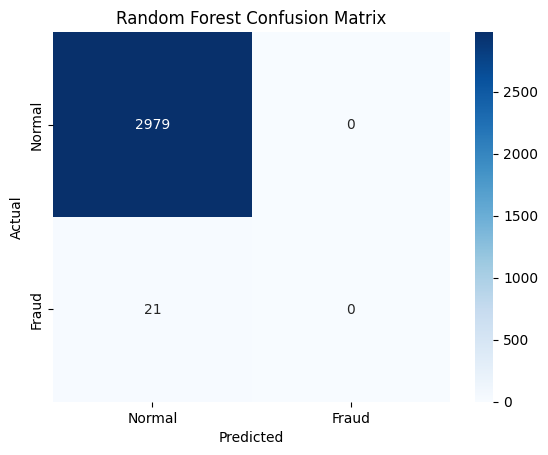

In [26]:
cm = confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Normal','Fraud'], 
            yticklabels=['Normal','Fraud'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

# STEP-10: MODEL-2 → XGBOOST

In [30]:


xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    eval_metric='logloss',
    n_jobs=-1
)

xgb.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


# Step 11: XGB Prediction & Metrics

In [40]:
y_pred_xgb = xgb.predict(X_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, xgb.predict_proba (X_test) [:,1])

print("XGBoost Metrics:")
print("Accuracy:", acc_xgb)
print("Precision:", prec_xgb)
print("Recall:", recall_xgb)
print("F1-Score:", f1_xgb)
print("ROC-AUC:", auc_xgb)

XGBoost Metrics:
Accuracy: 0.993
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC-AUC: 0.4580795728831982


C:\Users\rajku\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


# STEP 12: Feature Importance (XGBOOST)

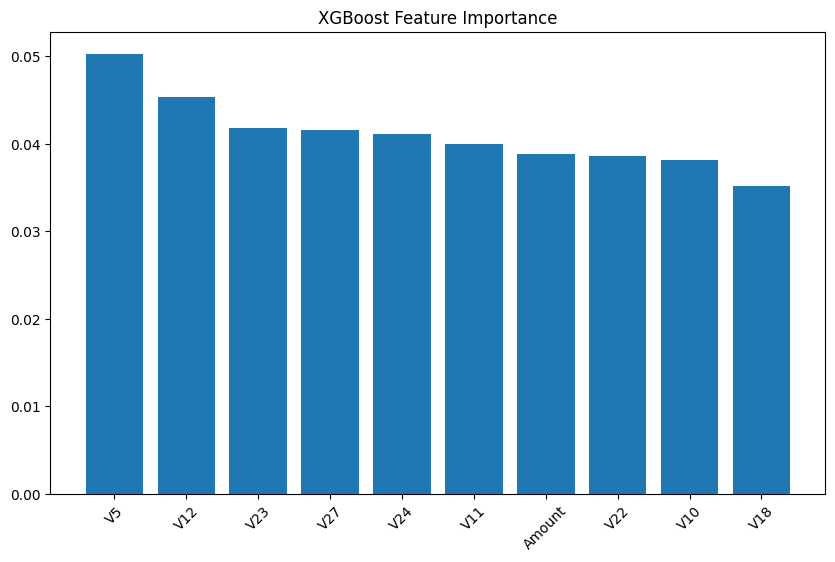

In [41]:
importances = xgb.feature_importances_
indices = np.argsort(importances) [::-1]

plt.figure(figsize=(10,6))
plt.title("XGBoost Feature Importance")
plt.bar(range (10), importances [indices] [:10])
plt.xticks(range (10), X.columns[indices] [:10], rotation=45)
plt.show()